In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Sex']=lc.fit_transform(df['Sex'])
df['Embarked']=lc.fit_transform(df['Embarked'])

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
X=df.drop('Survived',axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predict=knn.predict(X_test)

In [33]:
knn.score(X_test,y_test)

0.6779026217228464

In [41]:
score=[]
for i in range(1,268):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    score.append(np.round(knn.score(X_test,y_test),decimals=2))
    
    

In [42]:
print(score)

[0.69, 0.67, 0.68, 0.66, 0.7, 0.7, 0.69, 0.67, 0.68, 0.69, 0.67, 0.69, 0.68, 0.69, 0.69, 0.7, 0.7, 0.69, 0.69, 0.68, 0.69, 0.68, 0.68, 0.68, 0.68, 0.66, 0.67, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.66, 0.66, 0.67, 0.67, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.65, 0.66, 0.65, 0.66, 0.66, 0.66, 0.65, 0.65, 0.65, 0.64, 0.65, 0.64, 0.64, 0.64, 0.65, 0.64, 0.65, 0.64, 0.64, 0.65, 0.66, 0.66, 0.66, 0.65, 0.66, 0.65, 0.66, 0.65, 0.66, 0.64, 0.65, 0.64, 0.64, 0.64, 0.64, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64, 0.63, 0.63, 0.63, 0.64, 0.64, 0.63, 0.65, 0.63, 0.64, 0.63, 0.64, 0.63, 0.64, 0.64, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.65, 0.66, 0.65, 0.66, 0.65, 0.65, 0.65, 0.66, 0.65, 0.65, 0.64, 0.65, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

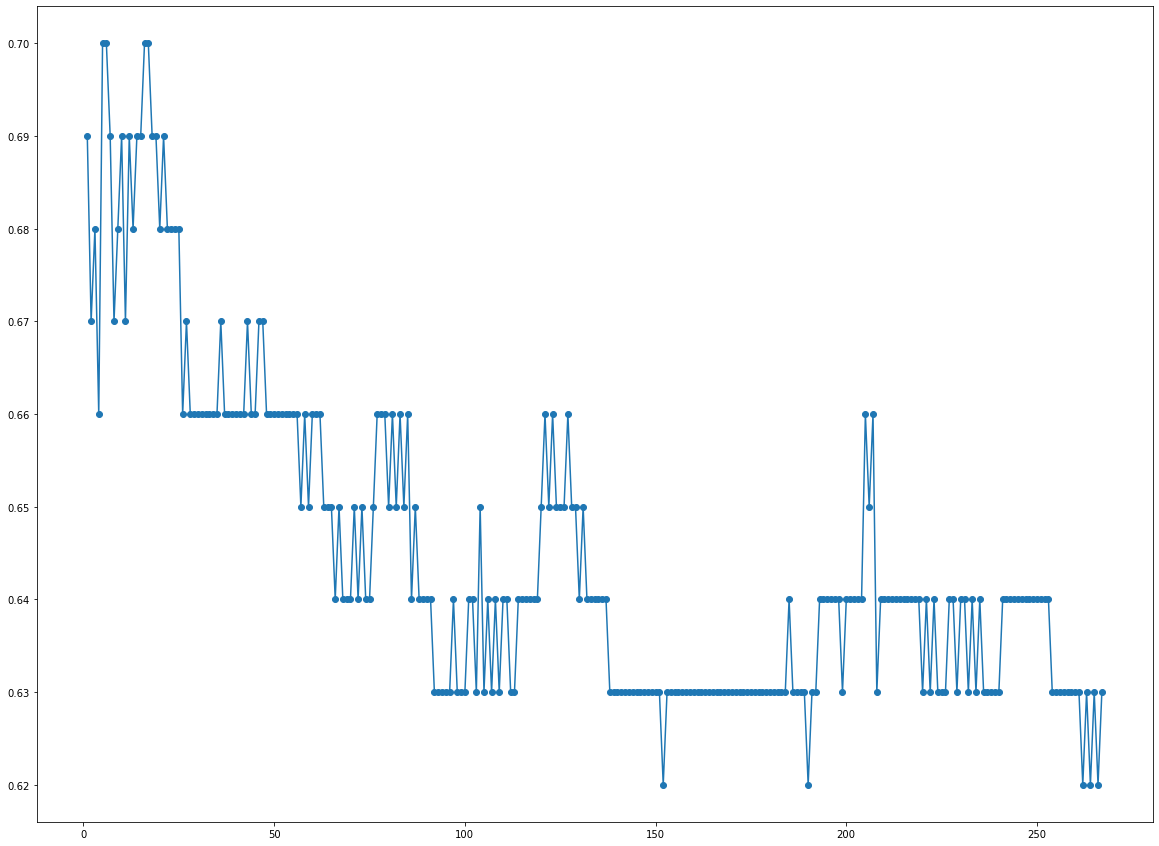

In [51]:
plt.figure(figsize=(20,15))
plt.plot(range(1,268),score,marker='o')